In [1]:
import os, sys, logging, traceback, pdb

from chop.tools import get_logger
from chop.tools.logger import set_logging_verbosity
from deit_tiny_search import search_gelu


/home/cx922/.conda/envs/mase/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/cx922/.conda/envs/mase/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
/home/cx922/.conda/envs/mase/lib/python3.11/site-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


In [2]:
def plot_accuracy_vs_bitwidth(acc_list_all, 
                            save_path=None, 
                            title="Accuracy vs Bit Width",
                            marker_style='bo-',
                            figsize=(10, 6)):
    """
    Plot accuracy vs bit width from a list of (bit_width, accuracy) pairs.
    
    Args:
        acc_list_all (list): List of tuples [(bit_width, accuracy), ...] or list of such lists
        save_path (str, optional): Path to save the plot. If None, display only.
        title (str, optional): Plot title. Defaults to "Accuracy vs Bit Width".
        marker_style (str, optional): Style of plot markers. Defaults to 'bo-'.
        figsize (tuple, optional): Figure size (width, height). Defaults to (10, 6).
    
    Example:
        acc_list = [(2, 0.65), (4, 0.75), (8, 0.82)]
        plot_accuracy_vs_bitwidth(acc_list, save_path='accuracy_plot.png')
    """
    import matplotlib.pyplot as plt
    
    # Create plot
    plt.figure(figsize=figsize)
    
    # Handle single acc_list or list of acc_lists
    if isinstance(acc_list_all[0], list):
        # Multiple accuracy lists
        all_accuracies = []
        markers = ['bo-', 'ro-', 'go-', 'mo-', 'co-']  # Different colors for different lists
        
        for i, single_acc_list in enumerate(acc_list_all):
            bit_widths, accuracies = zip(*single_acc_list)
            plt.plot(bit_widths, accuracies, markers[i % len(markers)], linewidth=2, markersize=8, 
                    label=f'Int Width {i+1}')
            all_accuracies.extend(accuracies)
            
            # Add value labels on points
            for x, y in single_acc_list:
                plt.annotate(f'{y:.3f}', 
                            (x, y), 
                            textcoords="offset points", 
                            xytext=(0,10), 
                            ha='center')
        
        plt.legend()
        min_acc = min(all_accuracies)
        max_acc = max(all_accuracies)
    else:
        # Single accuracy list
        bit_widths, accuracies = zip(*acc_list_all)
        plt.plot(bit_widths, accuracies, marker_style, linewidth=2, markersize=8)
        
        # Add value labels on points
        for x, y in acc_list_all:
            plt.annotate(f'{y:.3f}', 
                        (x, y), 
                        textcoords="offset points", 
                        xytext=(0,10), 
                        ha='center')
        
        min_acc = min(accuracies)
        max_acc = max(accuracies)
    
    # Add labels and title
    plt.xlabel('Bit Width', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title(title, fontsize=14)
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Customize axis
    plt.xticks(bit_widths)
    plt.ylim(min_acc-0.05, max_acc+0.05)
    
    # Adjust layout
    plt.tight_layout()
    
    # Save or show plot
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.close()
    else:
        plt.show()

In [3]:

set_logging_verbosity("info")  
acc_list_all = []
for int_width in [1,2,3,4,5]:
    acc_list = search_gelu(int_width=int_width)
    acc_list_all.append(acc_list)

INFO     Set logging level to info
INFO     Loaded existing search results from deit_tiny_patch16_224_mxint_search_results.json
INFO     start hash_in_frac_width search
  6%|▋         | 99/1563 [00:07<01:51, 13.11it/s, acc=0.608]


0.6075


  6%|▋         | 99/1563 [00:07<01:50, 13.29it/s, acc=0.613]


0.6134375


  6%|▋         | 99/1563 [00:07<01:48, 13.47it/s, acc=0.616]


0.6159375


  6%|▋         | 99/1563 [00:07<01:46, 13.78it/s, acc=0.617]


0.6165625


  6%|▋         | 99/1563 [00:07<01:45, 13.86it/s, acc=0.619]


0.619375


  6%|▋         | 99/1563 [00:07<01:46, 13.69it/s, acc=0.618]


0.6184375


  6%|▋         | 99/1563 [00:07<01:46, 13.75it/s, acc=0.618]
INFO     hash_in_frac_width: 5, acc: (5, 0.619375)


0.6184375


100%|█████████▉| 1562/1563 [01:24<00:00, 18.42it/s, acc=0.54] 
INFO     quant_config: {'by': 'type', 'gelu': {'config': {'quant_type': 'mxint', 'data_in_width': 8, 'data_in_exponent_width': 8, 'data_in_parallelism': (1, 32), 'data_out_width': 8, 'data_out_exponent_width': 8, 'data_out_parallelism': (1, 32), 'weight_width': 6, 'weight_exponent_width': 8, 'weight_parallelism': (1, 32), 'bias_width': 6, 'bias_exponent_width': 8, 'bias_parallelism': (1, 32), 'enable_internal_width': True, 'hash_in_int_width': 1, 'hash_in_frac_width': 5, 'hash_out_int_width': 16, 'hash_out_frac_width': 16}}}
INFO     original_acc: 0.72132, final_acc: 0.54036


0.54036


INFO     Loaded existing search results from deit_tiny_patch16_224_mxint_search_results.json
INFO     start hash_in_frac_width search
  6%|▋         | 99/1563 [00:07<01:58, 12.41it/s, acc=0.787]


0.786875


  6%|▋         | 99/1563 [00:07<01:53, 12.94it/s, acc=0.787]


0.7865625


  6%|▋         | 99/1563 [00:07<01:55, 12.73it/s, acc=0.786]


0.78625


  6%|▋         | 99/1563 [00:07<01:54, 12.82it/s, acc=0.787]


0.7865625


  6%|▋         | 99/1563 [00:07<01:54, 12.77it/s, acc=0.788]


0.7878125


  6%|▋         | 99/1563 [00:07<01:54, 12.77it/s, acc=0.785]


0.7853125


  6%|▋         | 99/1563 [00:07<01:54, 12.74it/s, acc=0.785]
INFO     hash_in_frac_width: 5, acc: (5, 0.7878125)


0.7853125


100%|█████████▉| 1562/1563 [01:32<00:00, 16.93it/s, acc=0.718]
INFO     quant_config: {'by': 'type', 'gelu': {'config': {'quant_type': 'mxint', 'data_in_width': 8, 'data_in_exponent_width': 8, 'data_in_parallelism': (1, 32), 'data_out_width': 8, 'data_out_exponent_width': 8, 'data_out_parallelism': (1, 32), 'weight_width': 6, 'weight_exponent_width': 8, 'weight_parallelism': (1, 32), 'bias_width': 6, 'bias_exponent_width': 8, 'bias_parallelism': (1, 32), 'enable_internal_width': True, 'hash_in_int_width': 2, 'hash_in_frac_width': 5, 'hash_out_int_width': 16, 'hash_out_frac_width': 16}}}
INFO     original_acc: 0.72132, final_acc: 0.71788


0.71788


INFO     Loaded existing search results from deit_tiny_patch16_224_mxint_search_results.json
INFO     start hash_in_frac_width search
  6%|▋         | 99/1563 [00:08<02:07, 11.47it/s, acc=0.791] 


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.24it/s, acc=0.791]


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.26it/s, acc=0.791]


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.21it/s, acc=0.791]


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.27it/s, acc=0.791]


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.25it/s, acc=0.791]


0.7909375


  6%|▋         | 99/1563 [00:08<01:59, 12.20it/s, acc=0.791]
INFO     hash_in_frac_width: 1, acc: (1, 0.7909375)


0.7909375


100%|█████████▉| 1562/1563 [01:37<00:00, 15.99it/s, acc=0.721]
INFO     quant_config: {'by': 'type', 'gelu': {'config': {'quant_type': 'mxint', 'data_in_width': 8, 'data_in_exponent_width': 8, 'data_in_parallelism': (1, 32), 'data_out_width': 8, 'data_out_exponent_width': 8, 'data_out_parallelism': (1, 32), 'weight_width': 6, 'weight_exponent_width': 8, 'weight_parallelism': (1, 32), 'bias_width': 6, 'bias_exponent_width': 8, 'bias_parallelism': (1, 32), 'enable_internal_width': True, 'hash_in_int_width': 3, 'hash_in_frac_width': 1, 'hash_out_int_width': 16, 'hash_out_frac_width': 16}}}
INFO     original_acc: 0.72132, final_acc: 0.72132


0.72132


INFO     Loaded existing search results from deit_tiny_patch16_224_mxint_search_results.json
INFO     start hash_in_frac_width search
  6%|▋         | 99/1563 [00:08<02:00, 12.19it/s, acc=0.791]
INFO     acc: 0.79125, quant_acc: 0.792, hash_in_frac_width: 1
INFO     hash_in_frac_width: 1, acc: (1, 0.79125)


0.79125


100%|█████████▉| 1562/1563 [01:38<00:00, 15.85it/s, acc=0.721]
INFO     quant_config: {'by': 'type', 'gelu': {'config': {'quant_type': 'mxint', 'data_in_width': 8, 'data_in_exponent_width': 8, 'data_in_parallelism': (1, 32), 'data_out_width': 8, 'data_out_exponent_width': 8, 'data_out_parallelism': (1, 32), 'weight_width': 6, 'weight_exponent_width': 8, 'weight_parallelism': (1, 32), 'bias_width': 6, 'bias_exponent_width': 8, 'bias_parallelism': (1, 32), 'enable_internal_width': True, 'hash_in_int_width': 4, 'hash_in_frac_width': 1, 'hash_out_int_width': 16, 'hash_out_frac_width': 16}}}
INFO     original_acc: 0.72132, final_acc: 0.72078


0.72078


INFO     Loaded existing search results from deit_tiny_patch16_224_mxint_search_results.json
INFO     start hash_in_frac_width search
  6%|▋         | 99/1563 [00:08<01:59, 12.22it/s, acc=0.791]
INFO     acc: 0.79125, quant_acc: 0.792, hash_in_frac_width: 1
INFO     hash_in_frac_width: 1, acc: (1, 0.79125)


0.79125


100%|█████████▉| 1562/1563 [01:38<00:00, 15.86it/s, acc=0.721]
INFO     quant_config: {'by': 'type', 'gelu': {'config': {'quant_type': 'mxint', 'data_in_width': 8, 'data_in_exponent_width': 8, 'data_in_parallelism': (1, 32), 'data_out_width': 8, 'data_out_exponent_width': 8, 'data_out_parallelism': (1, 32), 'weight_width': 6, 'weight_exponent_width': 8, 'weight_parallelism': (1, 32), 'bias_width': 6, 'bias_exponent_width': 8, 'bias_parallelism': (1, 32), 'enable_internal_width': True, 'hash_in_int_width': 5, 'hash_in_frac_width': 1, 'hash_out_int_width': 16, 'hash_out_frac_width': 16}}}
INFO     original_acc: 0.72132, final_acc: 0.72078


0.72078


In [2]:
# Save the accuracy list to a file
import pickle
import json
import os

def save_accuracy_list(acc_list_all, directory='saved_results', base_filename='acc_list_all'):
    """
    Save the accuracy list to both pickle and JSON formats.
    
    Args:
        acc_list_all: List of accuracy results to save
        directory: Directory to save the files in (default: 'saved_results')
        base_filename: Base name for the saved files (default: 'acc_list_all')
    
    Returns:
        tuple: Paths to the saved pickle and JSON files
    """
    # Create a directory for saved results if it doesn't exist
    os.makedirs(directory, exist_ok=True)
    
    # Define file paths
    pickle_path = os.path.join(directory, f"{base_filename}.pkl")
    json_path = os.path.join(directory, f"{base_filename}.json")
    
    # Save using pickle (binary format)
    with open(pickle_path, 'wb') as f:
        pickle.dump(acc_list_all, f)
    
    # Save using JSON (human-readable format)
    # Convert the data to a format that can be serialized to JSON
    json_compatible_data = []
    for acc_list in acc_list_all:
        json_compatible_data.append([(int(x), float(y)) for x, y in acc_list])
    
    with open(json_path, 'w') as f:
        json.dump(json_compatible_data, f, indent=4)
    
    print(f"Saved accuracy lists to {pickle_path} and {json_path}")
    return pickle_path, json_path

# Example usage
pickle_path, json_path = save_accuracy_list(acc_list_all)



NameError: name 'acc_list_all' is not defined

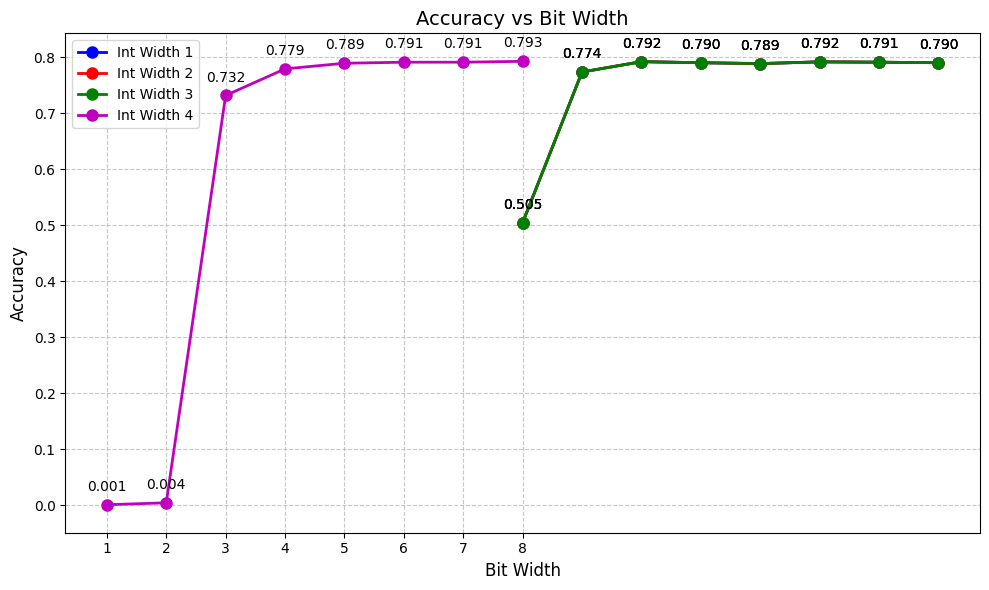

In [11]:


import pickle
acc_list_all = pickle.load(open("/home/cx922/mase/saved_results/vit_tiny_layer_norm_isqrt_search.pkl", "rb"))
plot_accuracy_vs_bitwidth(acc_list_all)

In [10]:
def plot_accuracy_vs_bitwidth(acc_list, 
                            break_points=None,  # [(y_min1, y_max1, x_min1, x_max1), (y_min2, y_max2, x_min2, x_max2)]
                            highlight_region=None,  # (y_lower, y_upper)
                            title=["Accuracy vs Bit Width", "accuracy", "bit width"],
                            marker_style='bo-',
                            figsize=(10, 6),
                            labels=None,
                            x_range=None):  # Added x_range parameter
    """
    Plot accuracy vs bit width with two charts: one showing the full range and 
    another highlighting a specific region.
    
    Args:
        acc_list: List of tuples [(bit_width, accuracy), ...] or list of such lists
        break_points: List of tuples [(y_min1, y_max1, x_min1, x_max1), (y_min2, y_max2, x_min2, x_max2)]
        highlight_region: Tuple of (y_lower, y_upper) to mark with dashed lines
        title: Plot title
        marker_style: Style of plot markers
        figsize: Figure size
        labels: List of labels for each accuracy list
        x_range: Tuple of (x_min, x_max) to set the x-axis range
    """
    import matplotlib.pyplot as plt
    
    # Check if acc_list is a list of lists
    if acc_list and isinstance(acc_list[0], list):
        # Multiple accuracy lists
        all_data = []
        for sublist in acc_list:
            if sublist:  # Check if sublist is not empty
                bit_widths, accuracies = zip(*sublist)
                all_data.append((bit_widths, accuracies))
    else:
        # Single accuracy list
        bit_widths, accuracies = zip(*acc_list)
        all_data = [(bit_widths, accuracies)]
    
    # Create figure with white background
    plt.style.use('default')
    f = plt.figure(figsize=figsize)
    
    # Create two subplots with height ratio 2:1
    gs = f.add_gridspec(3, 1)
    ax1 = f.add_subplot(gs[0:2, 0])  # First 2/3 of the height
    ax2 = f.add_subplot(gs[2, 0])    # Last 1/3 of the height
    
    # Plot data on both axes
    for i, (bit_widths, accuracies) in enumerate(all_data):
        # Use different colors for multiple lists
        if len(all_data) > 1:
            current_style = marker_style.replace('b', f'C{i}')
        else:
            current_style = marker_style
            
        # Use label if provided
        label = labels[i] if labels and i < len(labels) else f"Series {i+1}"
        
        # Plot on the first axis (full view)
        ax1.plot(bit_widths, accuracies, current_style, linewidth=1, markersize=4, label=label)
        
        # Plot on the second axis (zoomed/highlighted view)
        ax2.plot(bit_widths, accuracies, current_style, linewidth=1, markersize=4, label=label)
    
    # Customize legend appearance
    plt.rcParams['legend.fontsize'] = 10
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.edgecolor'] = 'gray'
    plt.rcParams['legend.fancybox'] = True
    plt.rcParams['legend.shadow'] = True
    plt.rcParams['legend.framealpha'] = 0.8
    
    # Set x-axis range if specified
    if x_range:
        ax1.set_xlim(x_range)
        ax2.set_xlim(x_range)
    
    # Set axis limits for both charts
    if break_points and len(break_points) > 0:
        y_min1, y_max1, x_min1, x_max1 = break_points[0]
        ax1.set_ylim(y_min1, y_max1)
        ax1.set_xlim(x_min1, x_max1)
    
    if break_points and len(break_points) > 1:
        y_min2, y_max2, x_min2, x_max2 = break_points[1]
        ax2.set_ylim(y_min2, y_max2)
        ax2.set_xlim(x_min2, x_max2)
    
    # Add dashed lines for highlight region if specified
    if highlight_region:
        y_lower, y_upper = highlight_region
        ax1.axhline(y=y_lower, color='r', linestyle='--', alpha=0.5)
        ax1.axhline(y=y_upper, color='r', linestyle='--', alpha=0.5)
        ax2.axhline(y=y_lower, color='r', linestyle='--', alpha=0.5)
        ax2.axhline(y=y_upper, color='r', linestyle='--', alpha=0.5)
    
    # Customize grid and labels
    for ax in [ax1, ax2]:
        ax.grid(True, linestyle=':', alpha=0.4)
    
    # Set x-ticks
    if all_data:
        all_bit_widths = sorted(set([bw for bws, _ in all_data for bw in bws]))
        ax1.set_xticks(all_bit_widths)
        ax2.set_xticks(all_bit_widths)
    
    # Set labels
    ax1.set_title("Full Range View", fontsize=8)
    ax2.set_title("Highlighted Region", fontsize=8)
    ax2.set_xlabel(title[2], fontsize=10)
    f.text(0.00, 0.5, title[1], va='center', rotation='vertical', fontsize=10)
    plt.suptitle(title[0], fontsize=14, y=0.98)
    
    # Add legend if we have multiple data series
    if len(all_data) > 1:
        ax1.legend(loc='upper right')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    return f


In [36]:
# Example usage:
def module_level_plot(module_name, data_folder, original_accuracy):
    acc_list = pickle.load(open("/home/cx922/mase/" + data_folder + "/gelu_mxint_search.pkl", "rb"))
    fig = plot_accuracy_vs_bitwidth(
        acc_list,
        break_points=[(0.0, original_accuracy + 0.1, 0, 10), (original_accuracy - 0.01, original_accuracy + 0.01, 0, 8)],
        highlight_region=(original_accuracy - 0.005, original_accuracy + 0.005),
        title=[f"{module_name} Gelu Hash Search", "accuracy", "frac width"],
        marker_style='bo-',
        figsize=(10, 6),
        x_range=(0, 10),
        labels=["int width=1", "int width=2", "int width=3", "int width=4", "int width=5"],
    )

    # Example usage:
    acc_list = pickle.load(open("/home/cx922/mase/" + data_folder + "/layer_norm_var_search.pkl", "rb"))
    fig = plot_accuracy_vs_bitwidth(
        acc_list,
        break_points=[(0.0, original_accuracy + 0.1, 6, 16), (original_accuracy - 0.01, original_accuracy + 0.01, 10, 15)],
        highlight_region=(original_accuracy - 0.005, original_accuracy + 0.005),
        title=[f"{module_name} LayerNorm Var Search", "accuracy", "frac width"],
        marker_style='bo-',
        figsize=(10, 6),
        x_range=(0, 10),
        labels=["int width=1", "int width=2", "int width=3", "int width=4", "int width=5"],
    )

    # Example usage:
    acc_list = pickle.load(open("/home/cx922/mase/" + data_folder + "/layer_norm_isqrt_search.pkl", "rb"))
    fig = plot_accuracy_vs_bitwidth(
        acc_list,
        break_points=[(0.0, original_accuracy + 0.1, 0, 10), (original_accuracy - 0.01, original_accuracy + 0.01, 3, 9)],
        highlight_region=(original_accuracy - 0.005, original_accuracy + 0.005),
        title=[f"{module_name} LayerNorm Isqrt Hash Search", "accuracy", "hash in width"],
        marker_style='bo-',
        figsize=(10, 6),
        x_range=(0, 10),
        labels=["int width=1", "int width=2", "int width=3", "int width=4", "int width=5"],
    )

    # Example usage:
    acc_list = pickle.load(open("/home/cx922/mase/" + data_folder + "/attention_exp_search.pkl", "rb"))
    fig = plot_accuracy_vs_bitwidth(
        acc_list,
        break_points=[(0.0, original_accuracy + 0.1, 0, 10), (original_accuracy - 0.01, original_accuracy + 0.01, 1, 9)],
        highlight_region=(original_accuracy - 0.005, original_accuracy + 0.005),
        title=[f"{module_name} Softmax Exp Hash Search", "accuracy", "hash in width"],
        marker_style='bo-',
        figsize=(10, 6),
        x_range=(0, 10),
        labels=["int width=1", "int width=2", "int width=3", "int width=4", "int width=5"],
    )

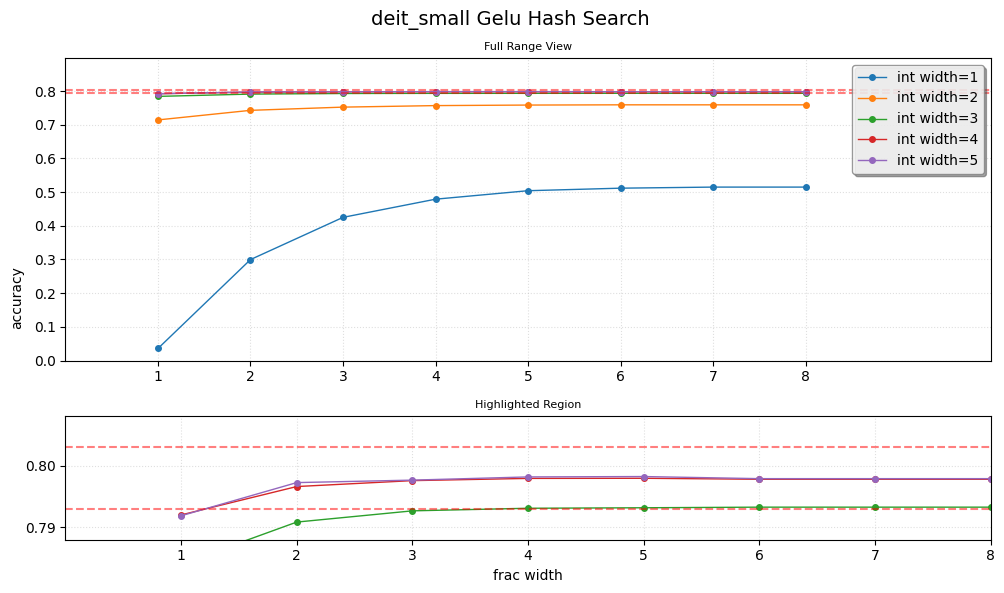

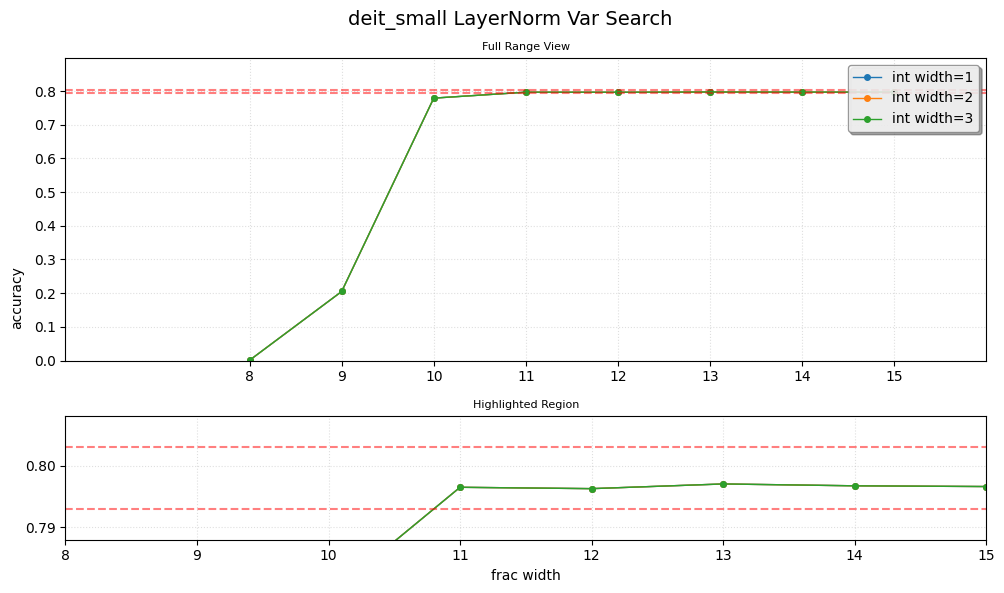

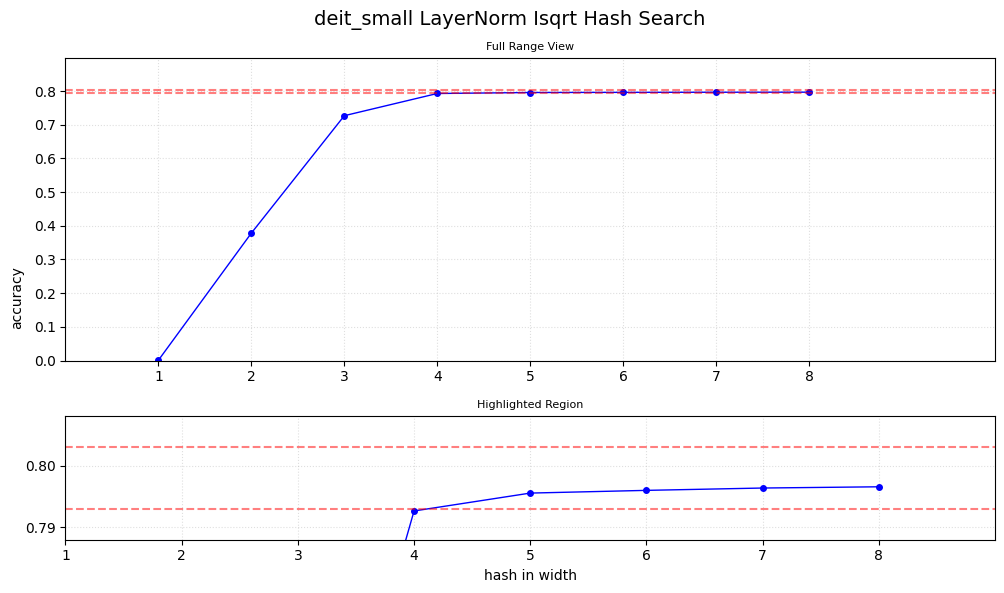

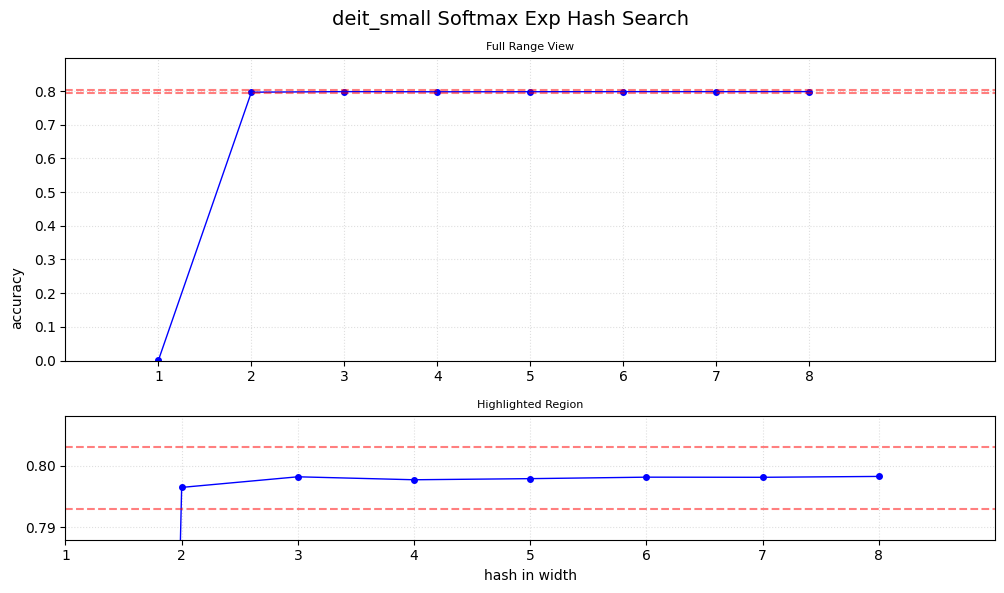

In [38]:
module_level_plot("deit_small", "deit_small_saved_results", 0.798)

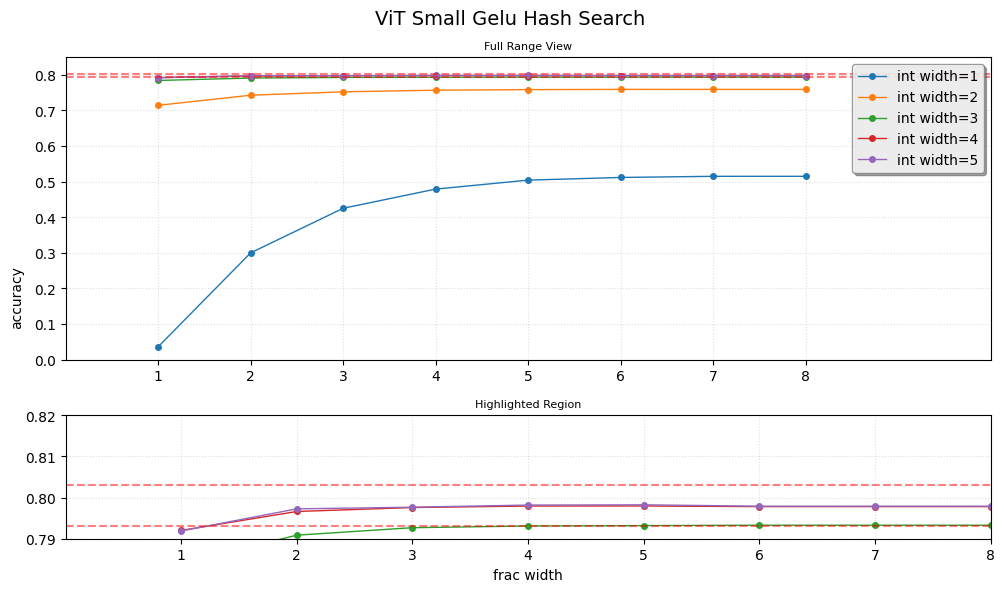

In [23]:
# Example usage:
acc_list = pickle.load(open("/home/cx922/mase/deit_small_saved_results/gelu_mxint_search.pkl", "rb"))
fig = plot_accuracy_vs_bitwidth(
    acc_list,
    break_points=[(0.0, 0.85, 0, 10), (0.79, 0.82, 0, 8)],
    highlight_region=(0.793, 0.803),
    title=["ViT Small Gelu Hash Search", "accuracy", "frac width"],
    marker_style='bo-',
    figsize=(10, 6),
    x_range=(0, 10),
    labels=["int width=1", "int width=2", "int width=3", "int width=4", "int width=5"],
)

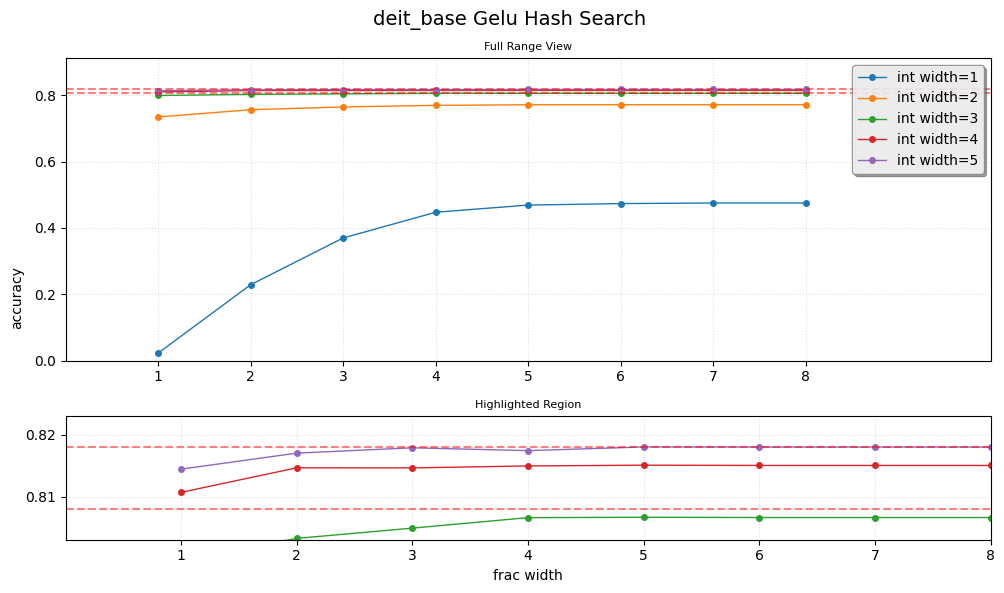

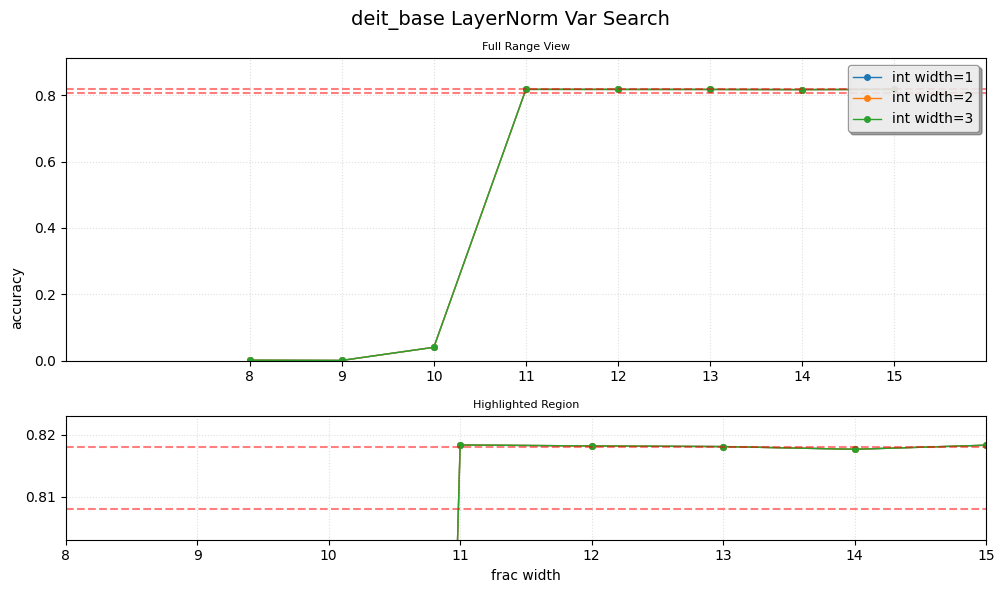

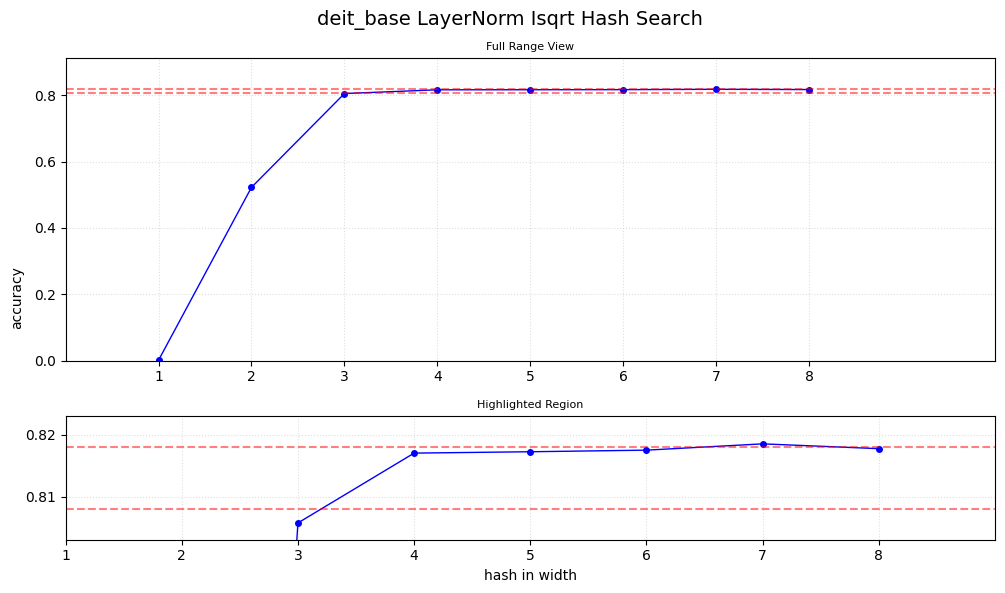

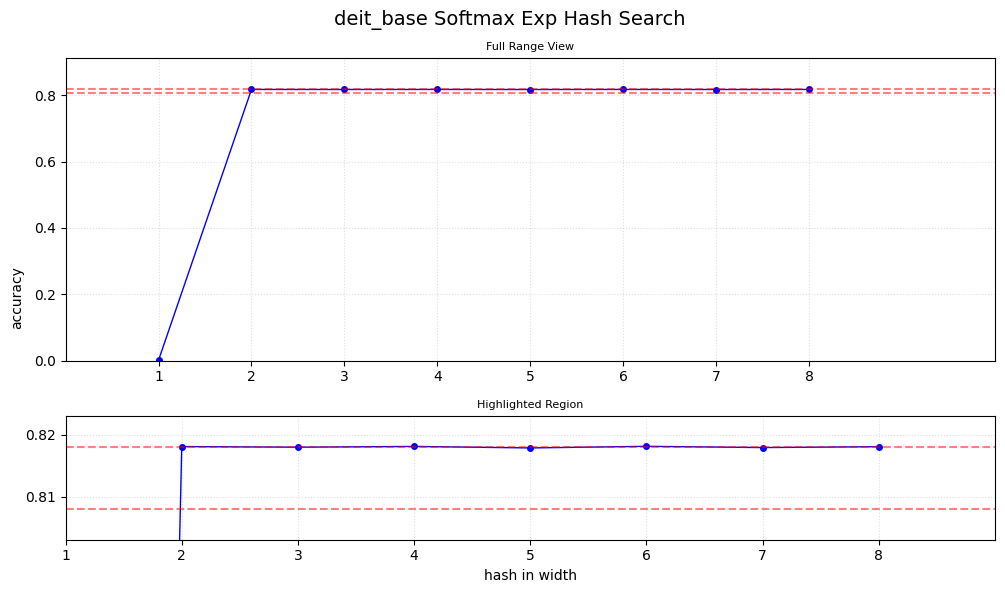

In [39]:
module_level_plot("deit_base", "deit_base_saved_results", 0.818)